# Signal Loudness Distribution

This notebook explores the distribution of the signal loudness. The purpose of this notebook is to compare how different quantization, normalization and resampling methods shifts the signal loudness distribution.

Quote from podcast audio tips:

> Broad level adjustments can help bring your podcast into a loudness range that is similar to
other podcasts. There are two levels that you will want to consider: peak and RMS. RMS level
approximates an average level of your signal. An RMS level around -16 to -12 dB
should be good, and is similar to the level that services like YouTube and iTunes normalize
material to.

Reference: https://www.izotope.com/en/learn/products/ozone/10-tips-for-a-great-sounding-podcast.html


In [1]:
import re
import sys
import random

# Setup the "PYTHONPATH"
sys.path.insert(0, '../')

In [14]:
%matplotlib inline

import subprocess
import os

import numpy as np
import librosa

from matplotlib import pyplot

from tqdm import tqdm_notebook
from numpy.polynomial.polynomial import polyfit


def get_sox_distribution(dataset, stat):
    """ Compute a stat distribution on dataset.

    Args:
        dataset (list): Dataset of signals.
        stat (str): Stat to fetch from SoX.

    Returns:
        (list): List of a stat from SoX
    """
    return_ = []
    dataset = sorted(dataset, key=lambda r: r['wav_filename'])
    wavs = [row['wav_filename'] for row in dataset]
    for row in tqdm_notebook(dataset):
        command = 'sox %s -n stats' % (row['wav_filename'],)
        result = subprocess.check_output(command, shell=True, stderr=subprocess.STDOUT).decode("utf-8") 
        rms_level_db = float([row.split()[-1] for row in result.split('\n') if stat in row][0])
        return_.append(rms_level_db)
    return return_, wavs

def get_librosa_peak_distribution(dataset):
    """ Get peak distribution on dataset with librosa.

    Args:
        dataset (list): Dataset of signals.

    Returns:
        (list): Maximum signal energy.
    """
    peaks = []
    dataset = sorted(dataset, key=lambda r: r['wav_filename'])
    wavs = [row['wav_filename'] for row in dataset]
    for row in tqdm_notebook(dataset):
        signal = librosa.core.load(row['wav_filename'], sr=None)[0]
        peaks.append(np.max(np.abs(signal)))
    return peaks, wavs
        
def plot_stat(stat, wavs):
    """ Plot a SoX stat using a scatter plot.

    Args:
        stat (list):  List of stat for every wav.
        wavs (list): List of WAV names used for xticks.
    """
    pyplot.style.use('ggplot')
    pyplot.figure(figsize=(50, 5))
    pyplot.plot(stat, '.', zorder=0)
    pyplot.xlabel('Clip', fontsize=24)
    xticks = {os.path.basename(wav).split('-')[0]: i for i, wav in enumerate(wavs)}
    locs = list(xticks.values())
    labels = list(xticks.keys())
    pyplot.grid(linestyle='-', linewidth=3, zorder=3)
    pyplot.xticks(locs, labels, fontsize=24, rotation='vertical')
    pyplot.yticks(fontsize=24)

## LJ Speech Dataset Signal Loudness Distribution

First, we look at LJ Speech dataset without preprocessing.

In [15]:
from src.datasets import lj_speech_dataset

100%|██████████| 13100/13100 [00:00<00:00, 24755.57it/s]


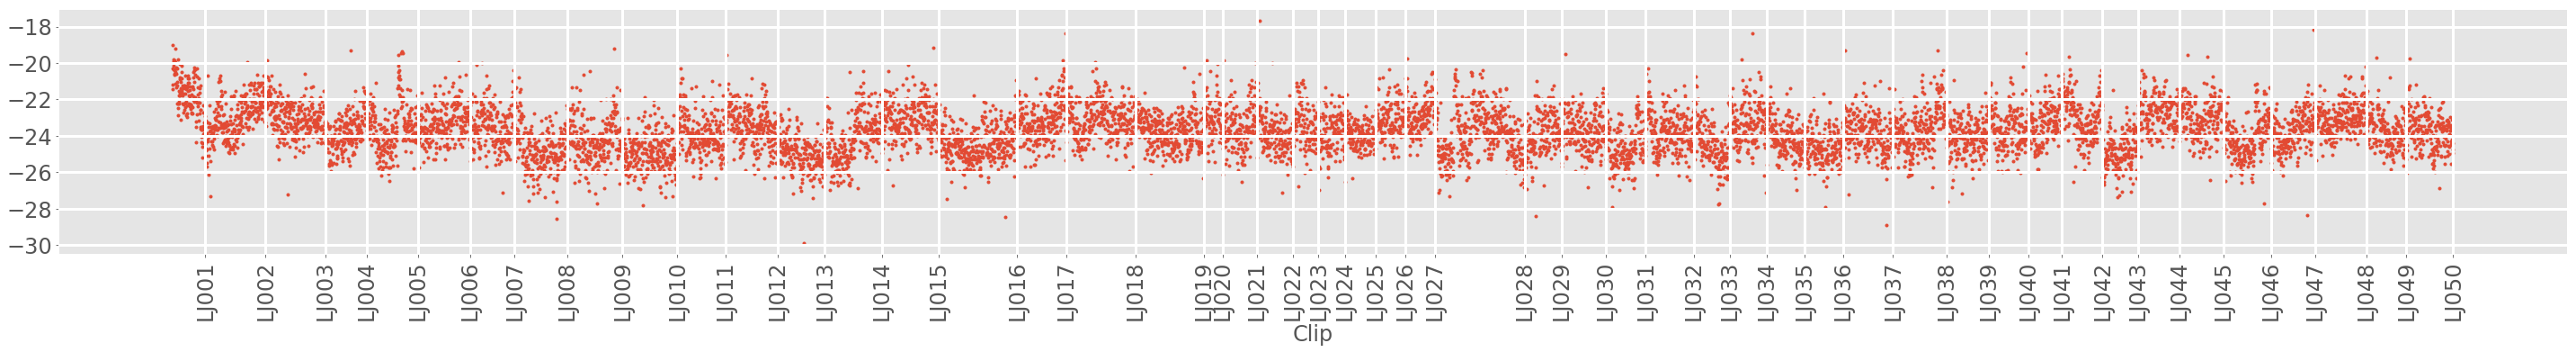

In [16]:
train, _ = lj_speech_dataset(directory='../data', verbalize=False, resample=None, norm=None, loudness=False,
                              guard=False, lower_hertz=None, upper_hertz=None)
plot_stat(*get_sox_distribution(train, 'RMS lev dB'))

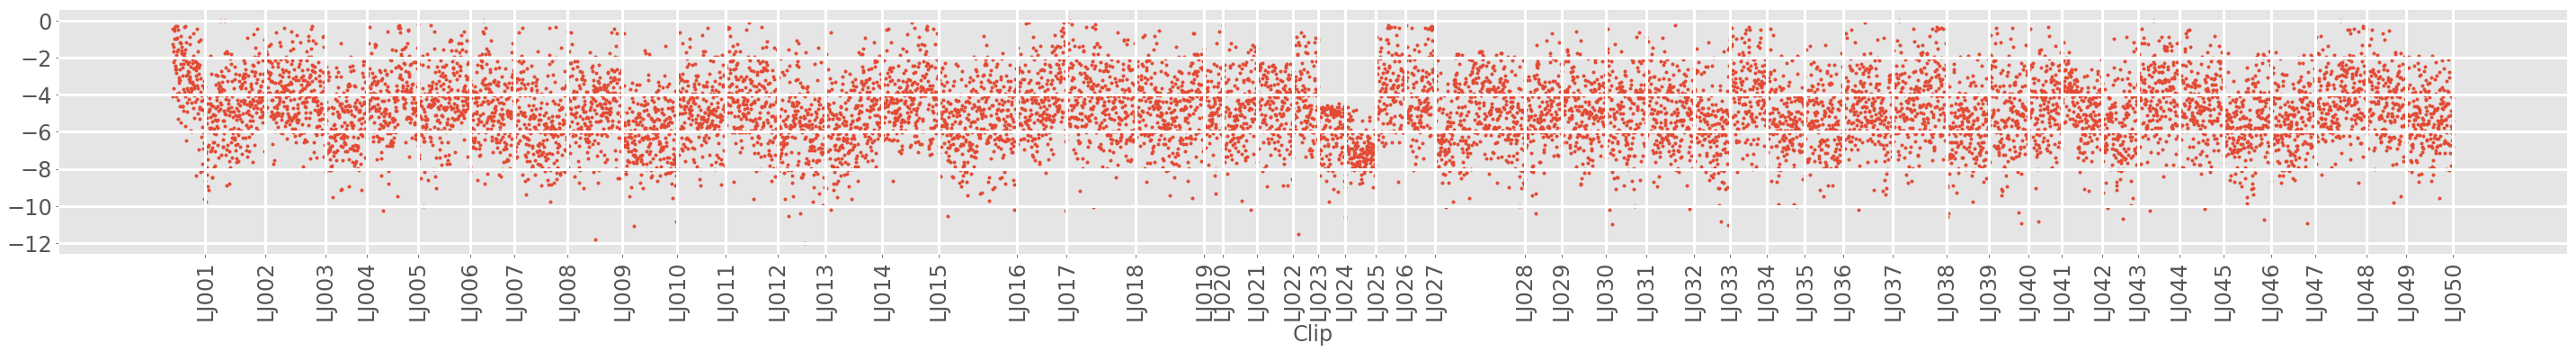

In [17]:
plot_stat(*get_sox_distribution(train, 'Pk lev dB'))

Explore loudness levels with standard preprocessing.

100%|██████████| 13100/13100 [00:01<00:00, 6576.59it/s]


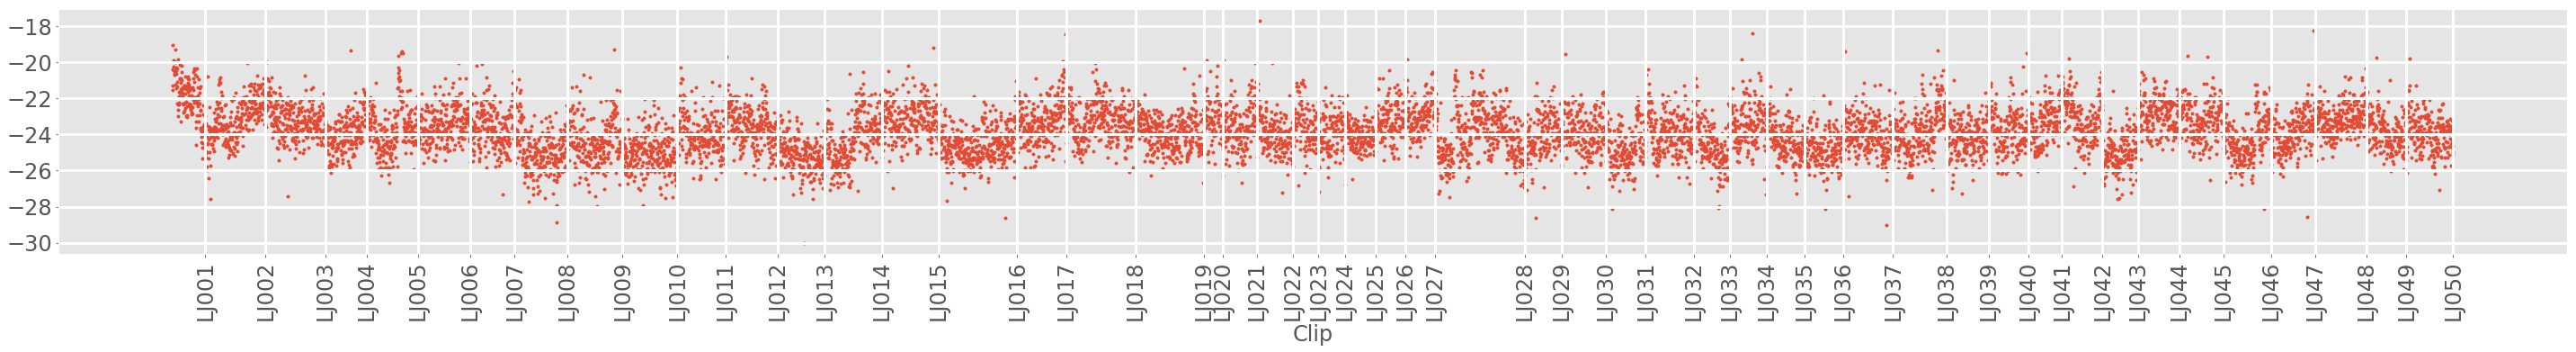

In [18]:
train, _ = lj_speech_dataset(directory='../data', verbalize=False, resample=24000, norm=None, loudness=False,
                              guard=True, lower_hertz=125, upper_hertz=9100)
plot_stat(*get_sox_distribution(train, 'RMS lev dB'))

Explore loudness levels with loudness preprocessing.

100%|██████████| 13100/13100 [00:01<00:00, 6665.18it/s]


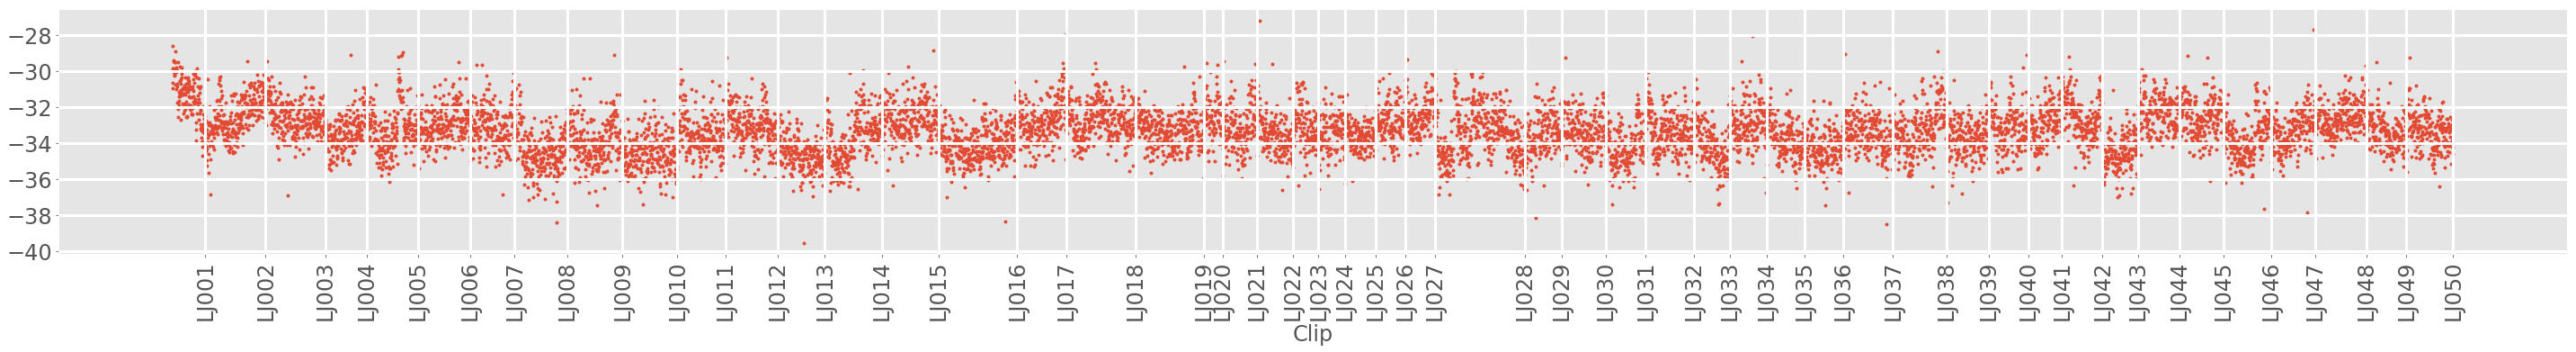

In [19]:
train, _ = lj_speech_dataset(directory='../data', verbalize=False, resample=24000, norm=None, loudness=True,
                              guard=True, lower_hertz=125, upper_hertz=9100)
plot_stat(*get_sox_distribution(train, 'RMS lev dB'))

Explore loudness levels with loudness and norm preprocessing.

100%|██████████| 13100/13100 [00:01<00:00, 6577.41it/s]


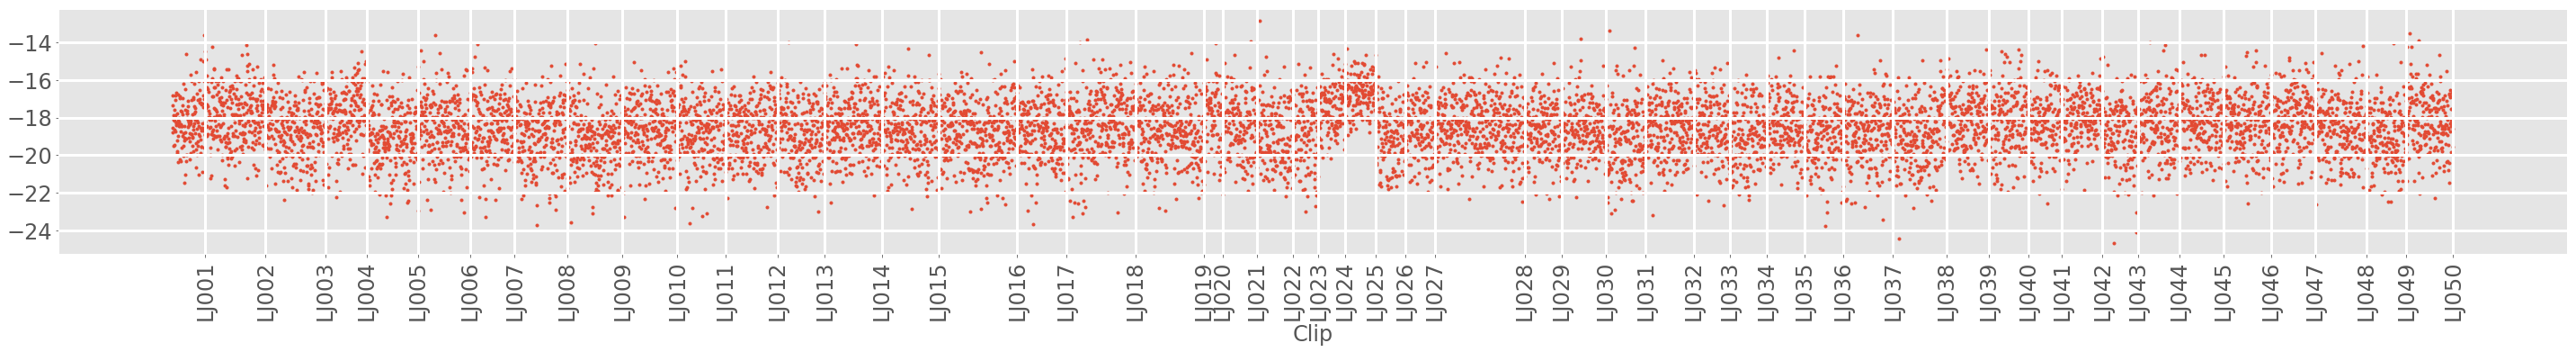

In [20]:
train, _ = lj_speech_dataset(directory='../data', verbalize=False, resample=24000, norm=True, loudness=True,
                              guard=True, lower_hertz=125, upper_hertz=9100)
plot_stat(*get_sox_distribution(train, 'RMS lev dB'))

Explore loudness levels with norm preprocessing.

100%|██████████| 13100/13100 [00:01<00:00, 7612.21it/s]


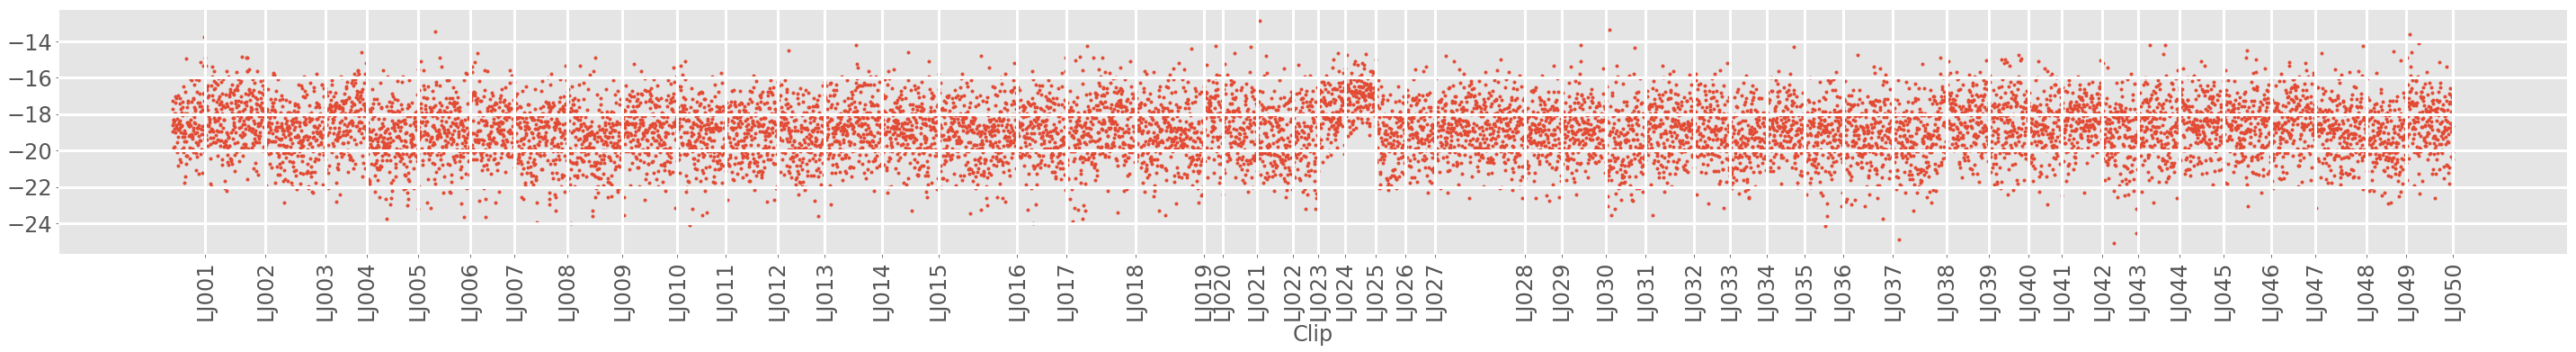

In [21]:
train, _ = lj_speech_dataset(directory='../data', verbalize=False, resample=24000, norm=True, loudness=False,
                              guard=True, lower_hertz=125, upper_hertz=9100)
plot_stat(*get_sox_distribution(train, 'RMS lev dB'))

Visualize the peak level distribution of LJ Speech after preprocessing and before...

100%|██████████| 13100/13100 [00:00<00:00, 15103.88it/s]


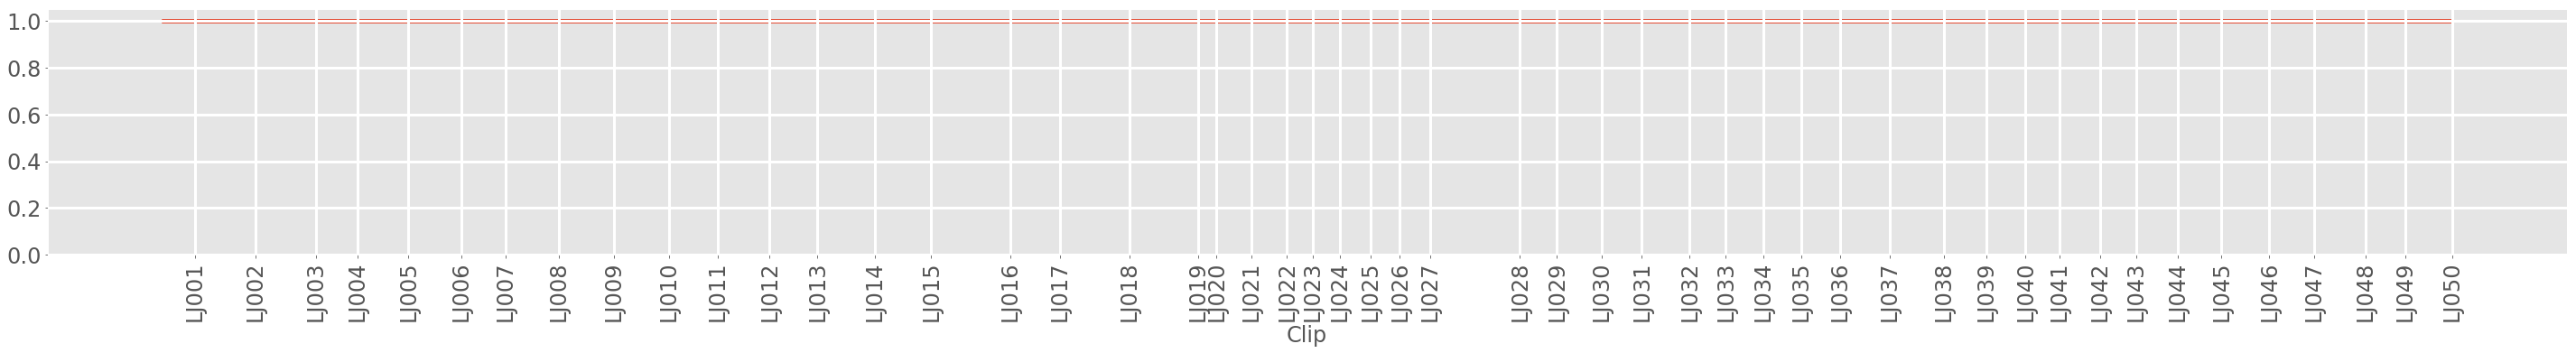

In [22]:
train, _ = lj_speech_dataset(directory='../data', verbalize=False, resample=24000, norm=True, loudness=False,
                              guard=True, lower_hertz=125, upper_hertz=9100)
plot_stat(*get_librosa_peak_distribution(train))
pyplot.ylim(0.0, 1.05)
pyplot.show()

100%|██████████| 13100/13100 [00:00<00:00, 17779.25it/s]


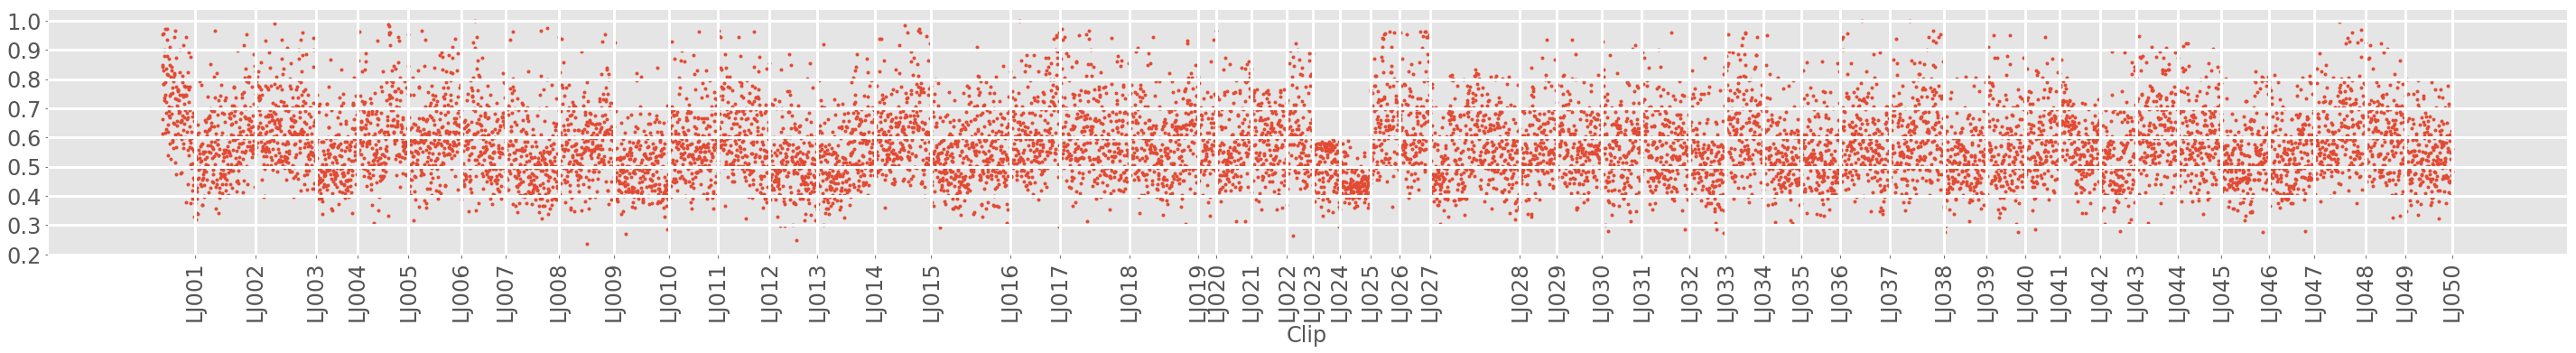

In [23]:
import librosa
train, _ = lj_speech_dataset(directory='../data', verbalize=False, resample=24000, norm=None, loudness=False,
                              guard=True, lower_hertz=125, upper_hertz=9100)
plot_stat(*get_librosa_peak_distribution(train))